# Outliers and their Treatments

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df['Age'].isnull().sum()

177

C:\Users\tom97\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

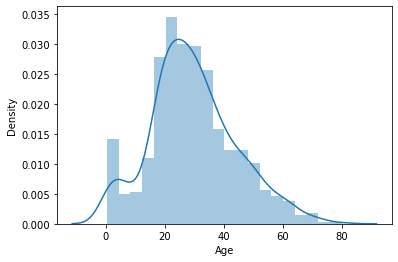

In [36]:
sns.distplot(df['Age'].dropna())

C:\Users\tom97\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

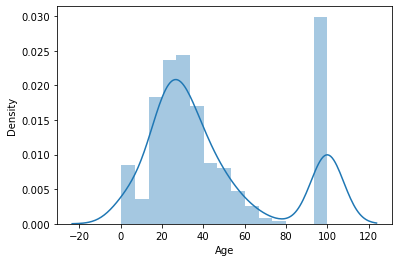

In [37]:
sns.distplot(df['Age'].fillna(100))

## 1. Outliers in Gaussian Distributed Feature and its Treatment

Text(0, 0.5, 'No of Passengers')

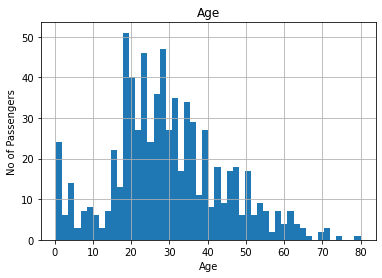

In [38]:
fig = df.Age.hist(bins=50)
fig.set_title("Age")
fig.set_xlabel("Age")
fig.set_ylabel("No of Passengers")

C:\Users\tom97\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

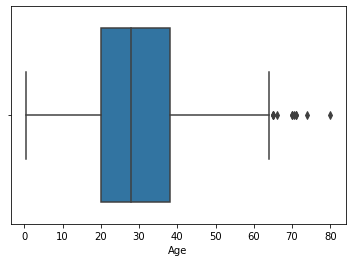

In [39]:
sns.boxplot(df.Age)

In [40]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [41]:
upper_boundary = df.Age.mean()+3*df.Age.std()
lower_boundary = df.Age.mean()-3*df.Age.std()
print("upper_boundary: ",upper_boundary),print("lower_boundary: ",lower_boundary),print("Mean Age: ",df.Age.mean())

upper_boundary:  73.27860964406095
lower_boundary:  -13.88037434994331
Mean Age:  29.69911764705882


(None, None, None)

In [42]:
data = df.copy()
data.loc[data.Age>=73,'Age'] = 73

Text(0, 0.5, 'No of Passengers')

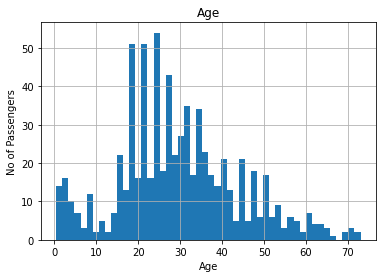

In [43]:
fig = data.Age.hist(bins=50)
fig.set_title("Age")
fig.set_xlabel("Age")
fig.set_ylabel("No of Passengers")

## 2. Outliers in Skewed Distributed Feature and its Treatment

Text(0, 0.5, 'No of Passengers')

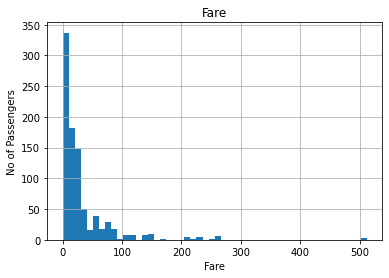

In [44]:
fig = data.Fare.hist(bins=50)
fig.set_title("Fare")
fig.set_xlabel("Fare")
fig.set_ylabel("No of Passengers")

In [45]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [46]:
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
IQR

23.0896

In [47]:
upper_bridge = data.Fare.quantile(0.75) + (3*IQR)
lower_bridge = data.Fare.quantile(0.25) - (3*IQR)
print("upper_bridge: ",upper_bridge),print("lower_bridge: ",lower_bridge),print("Fare IQR: ",IQR)

upper_bridge:  100.2688
lower_bridge:  -61.358399999999996
Fare IQR:  23.0896


(None, None, None)

In [48]:
data.loc[data.Fare>=100,'Fare'] = 100

Text(0, 0.5, 'No of Passengers')

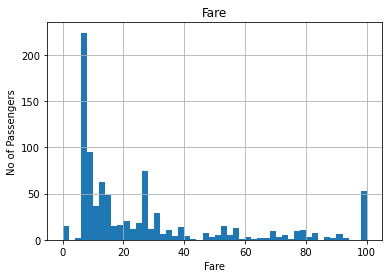

In [49]:
fig = data.Fare.hist(bins=50)
fig.set_title("Fare")
fig.set_xlabel("Fare")
fig.set_ylabel("No of Passengers")